In [17]:
import adbc_driver_postgresql.dbapi
import pandas as pd
import numpy as np
import geopandas
from sqlalchemy import create_engine
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

In [10]:
uri = "postgresql://david@localhost/census"
conn = adbc_driver_postgresql.dbapi.connect(uri)

In [19]:
cbsa_df = geopandas.read_postgis(sql="cbsa_popcenter", con=conn, geom_col="geometry") # type: ignore


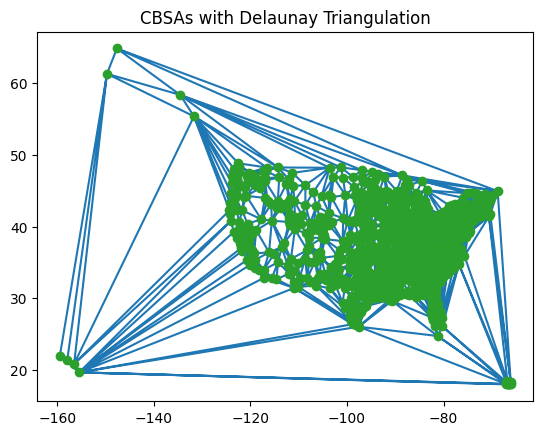

In [18]:
points_np = np.array([[p.x, p.y] for p in cbsa_df.geometry])
tri = Delaunay(points_np)

plt.triplot(points_np[:,0],points_np[:,1],tri.simplices)
plt.plot(points_np[:,0],points_np[:,1], 'o')
plt.title("CBSAs with Delaunay Triangulation")
plt.show()
